In [0]:
from tensorflow.keras.models import load_model
from skimage import transform
from skimage import exposure
from skimage import io
from imutils import paths
import numpy as np
import argparse
import imutils
import random
import cv2
import os
import pickle


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model=load_model("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/cnnmodel_v3_E30.model")

In [0]:
#TestX=pickle.load(open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/testxpickle.p","rb"))
#TestY=pickle.load(open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/testypickle.p","rb"))


In [0]:
labelNames = open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/signnames.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]


In [0]:
row_test=open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/Test.csv").read().strip().split("\n")[1:]
random.Random(20).shuffle(row_test)
row_test=row_test[:100]
label_test=[]
for row in row_test:
  label_test.append(int(row.split(",")[-2]))

#random.Random(20).shuffle(label_test)
#print(label_test)

In [0]:
from timeit import default_timer as timer


In [0]:
#imagePaths = list(paths.list_images("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/Test"))
imagePaths=open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/Test.csv").read().strip().split("\n")[1:]
random.Random(20).shuffle(imagePaths)

imagePaths = imagePaths[:100]
label=[]
label_pred=[]
path=[]
start=timer()
basepath="drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign"
for row in imagePaths:
	imgPath=row.split(",")[-1]
	imagePath=os.path.sep.join([basepath,imgPath])
	path.append(imagePath)
	image = io.imread(imagePath)
	
	image = transform.resize(image, (32, 32))
	image = exposure.equalize_adapthist(image, clip_limit=0.1)
	image = image.astype("float32") / 255.0
	image = np.expand_dims(image, axis=0)
	preds = model.predict(image)
	j = preds.argmax(axis=1)[0]
	label_pred.append(j)
	label.append(labelNames[j])

end=timer()
time=end-start

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [0]:
print("Model took {} seconds to predict all test images",time)

Model took {} seconds to predict all test images 3.089135963999979


In [0]:
print(len(path))

100


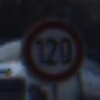

Predicted Label:  Speed limit (120km/h)
Actual Label : Speed limit (120km/h)


In [0]:

n=70
from google.colab.patches import cv2_imshow
test_img=cv2.imread(path[n])
test_img=cv2.resize(test_img,(100,100))
cv2_imshow(test_img)
print("Predicted Label: ",label[n])
print("Actual Label :",labelNames[label_test[n]])

In [0]:
print(label_test[n])
print(label_pred[n])

8
8


In [0]:
from sklearn.metrics import classification_report

print(classification_report(label_test,label_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
